# Project: Investigate a Dataset - [Database_No_show_appointments]


# Dataset Description

PatienID: it comprises of number for identification of patient.

AppointmentID: it comprises of number for identification of patient.

Gender: F – stands for female.
	    M – stands for male.
        
ScheduledDay:  Date - tells us on what day the patient set up their appointment.

AppointmentDay: Date -  the day of the actual appointment, when they have to visit the doctor.

Age: tells us how old a patient is.

Neighbourhood	 : indicates the location of the hospital.

Scholarship : 0- A patient is enrolled in the Brasilian welfare program Bolsa Família.
              1- Patient not enrolled in the program.
              
Hipertension : 0- A patient do not have Hypertension.
               1- A patient with Hypertension.

Diabetes: 0- A patient do not have Diabetes.
          1- A patient with Diabetes.
          
Alcoholism: 0- A non Alcoholic patient.
            1- An Alcoholic patient.
            
Handicap: 0- A non Handicap patient.
          1- An Handicap patient.
          
SMS_received: 0- Patients who didn’t receive SMS.
              1- Patients who received SMS.
              
No-show: No - Patients who showed up for their appointment.
         Yes - Patients who didn’t show up for their appointment.






	  



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# Some observation

    1. There are no missing values in the dataset
    2. We have 5 columns with data type as 'object', 8 of type 'int' and 1 as type 'float'
    3. We have a total of 14 columns, 13 of them are independent and 1 dependent(No-show )

In [4]:
df.describe(include='all')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN


# Observations

    1. We have two(2) unique values for column 'Gender', 27 for column 'AppointmentDay', 81 for column 'Neighbourhood' and 2 for column 'No-show'.
    2. We can see that the minimum age is -1, but its not possible to have a negative age and the maximum age is 115.
    3. On average, the patients are 37yrs, 25% of patients are below 18yrs and 75% of them are below 55yrs.
    4. 75% of patients recieved an sms in regards to appointment.
    

# Treating patientID with type float

In [5]:
# checking the total numbers of patient whose ID are of type float

float_patientID = df[~ df['PatientId'].apply(lambda x: x.is_integer())]
print(f"only {len(float_patientID)} patients have their ID's as type as float")

float_patientID



only 5 patients have their ID's as type as float


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


In [6]:
# Converting patients ID from float to int
df['PatientId'] = df['PatientId'].astype('int64')

# Confirming if the patient_id is of type int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


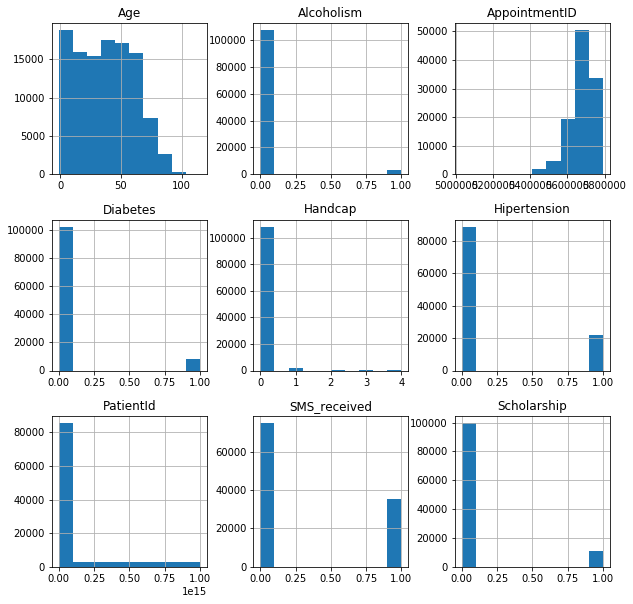

In [7]:
df.hist(figsize=(10,10));

# Observation from Histogram plot

    age: Most of the patients are young people and the appointment level drops more for people who are above 50yrs.
    Alcohol: Majority of the patient are not alcoholic.
    Diabetes: Majority of the patient are also not diabetic.
    Handicap: There are four(4) categories of handicap and majority of the patients are not handicaped.
    Scholarship: Most of the patients are not enrolled in Brasilian welfare program Bolsa Família.
    

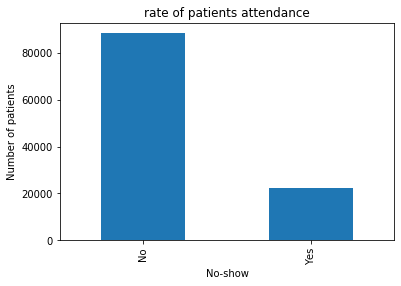

In [21]:
# visualization to get information on patient who attendent or do not attend appointment

# NO signifies patient who attended their appointment
# YES signifies people who do not attend their appointment


def plot_bar(df, col, x_label, y_label, title): # creating a function for plotting and visualization
    df[col].value_counts().plot(kind='bar');
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    
plot_bar(df,'No-show', 'No-show', 'Number of patients', 'rate of patients attendance' )

In [11]:
# Removing rows with age = -1, since its not possible to have that kind of age

df = df[df.Age >=0]
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


as we can see, the dataset count has reduced by one and the minimum age is no longer -1 but zero(0)

Total number of female patient = 71839
Total number of male patient = 38687
percentage of female in the dataset = 64%


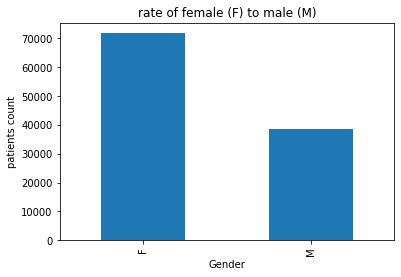

In [20]:
# this shows that women where more than men who booked appointmeent

plot_bar(df, 'Gender', 'Gender', 'patients count', 'rate of female (F) to male (M)')

total_females = len(df[df['Gender'] == 'F'])
total_male = len(df[df['Gender'] == 'M'])

#total number of male and female in the data set
print(f'Total number of female patient = {total_females}')
print(f'Total number of male patient = {total_male}')

# percentage of women in the dataset
print(f'percentage of female in the dataset = {int(total_females/len(df)*100)}%')

we can see that majority of the patients are female and they make up about 64% percent of the dataset

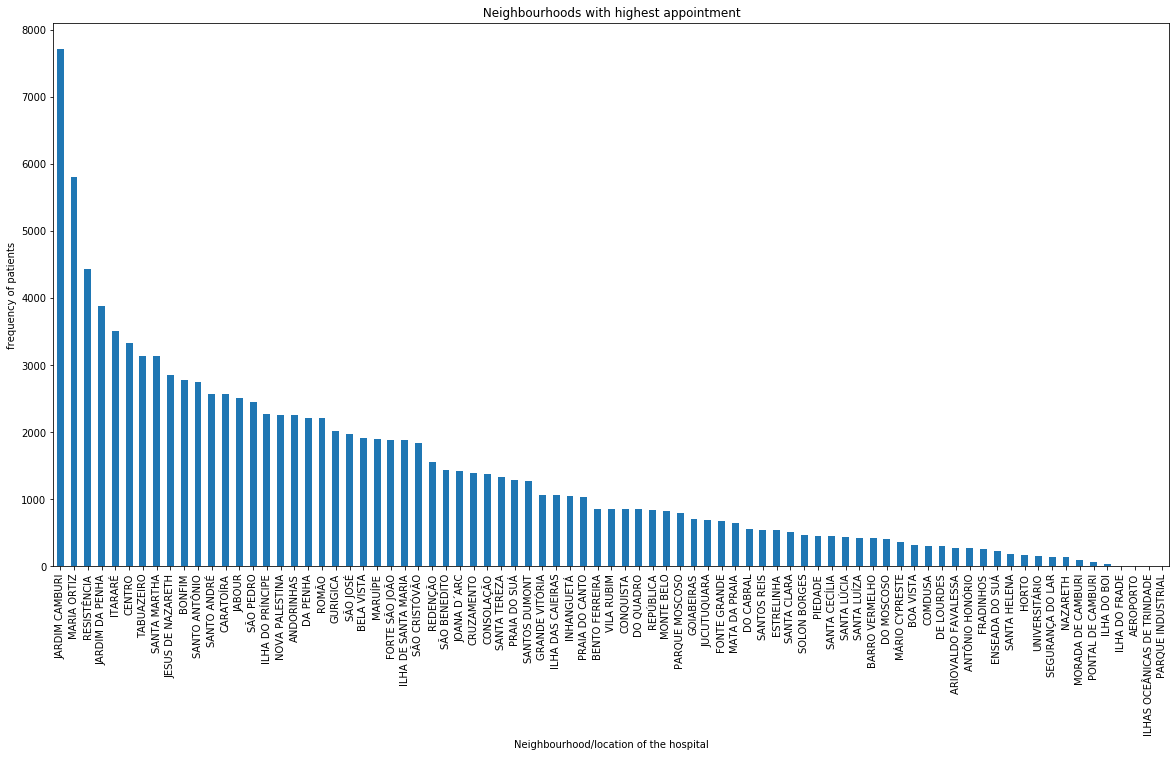

In [14]:
# getting visual on the neighbourhood 

plt.figure(figsize=(20,10))
plot_bar(df, 'Neighbourhood', 'Neighbourhood/location of the hospital', 'frequency of patients', ' Neighbourhoods with highest appointment ',)

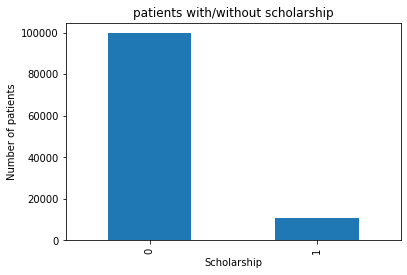

In [19]:
# 1 - people on the schorlarship
# 0 - people not on the schorlarship

plot_bar(df, 'Scholarship', 'Scholarship', 'Number of patients', 'patients with/without scholarship')

We can clearly see from our plot that majority of patients are not enrolled in Brasilian welfare program Bolsa Família

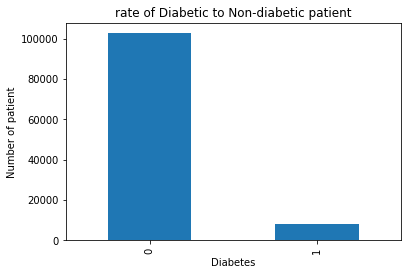

In [18]:

plot_bar(df, 'Diabetes', 'Diabetes', 'Number of patient', 'rate of Diabetic to Non-diabetic patient')

patient without diabetes are more comapred to those with diabetes

# Questions
    
    From my Analysis on the Dataset, some of the questions i would love to answer are:
    
    1. What are the percentage of both male and female patient who missed an appointment?
    2. Does sending of messages affect patients appointment?
    3. What percentage of patient missed an appointment?
    4. could there be patients with more than one appointment?

# 1. What are the percentage of both male and female patient who missed an appointment?

In [22]:
# function for plotting with seaborn

def sns_plot(df, x, hue, title):
    sns.countplot(x=x, hue=hue, data=df).set(title=title)

out of 38687 appointments made by male, 7725 were missed with a percentage of 20%
out of 71839 appointments made by male, 14594 were missed with a percentage of 20%


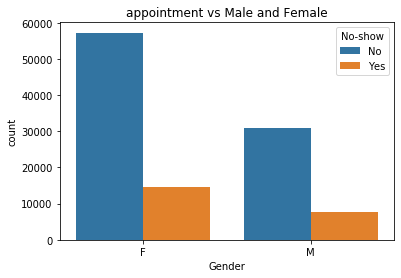

In [23]:

sns_plot(df, 'Gender', 'No-show','appointment vs Male and Female' )

all_male = df[df['Gender'] == 'M']
all_female = df[df['Gender'] == 'F']

missed_by_male = len(all_male[all_male['No-show'] == 'Yes'])
missed_by_female = len(all_female[all_female['No-show'] == 'Yes'])

print(f'out of {len(all_male)} appointments made by male, {missed_by_male} were missed with a percentage of {int(round(missed_by_male/len(all_male)*100))}%')
print(f'out of {len(all_female)} appointments made by male, {missed_by_female} were missed with a percentage of {int(round(missed_by_female/len(all_female)*100))}%')

# 2. Does sending of messages affect patients appointment?

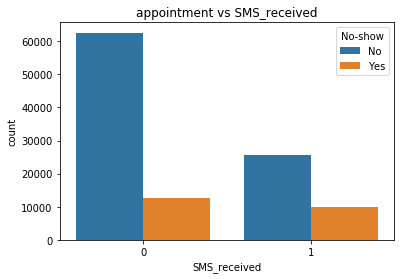

In [25]:

sns_plot(df, 'SMS_received', 'No-show','appointment vs SMS_received' )

as we can see from our plot, sending of sms doesn't play vital role in patients showing up for appointment as most of the patients who turned up didn't receive any sms

#  3. What percentage of patient missed an appointment?

20% of appointments were missed


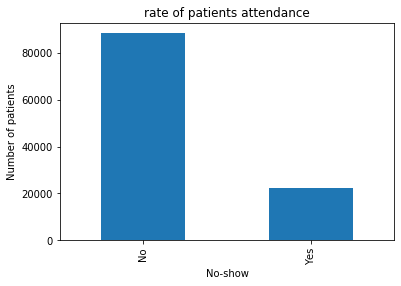

In [26]:
plot_bar(df,'No-show', 'No-show', 'Number of patients', 'rate of patients attendance' )

missed = len(df[df['No-show']== 'Yes'])

print(f'{int(missed/len(df)*100)}% of appointments were missed')

#     4. could there be patients with more than one appointment?

In [27]:
df['PatientId'].value_counts()

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
258424392677       62
                   ..
2886912523138       1
68129842443312      1
99264711372         1
2212945531847       1
57863365759569      1
Name: PatientId, Length: 62298, dtype: int64

In [28]:
# let us pick the top 5 patients with the most appearance

df['PatientId'].value_counts().iloc[0:5]

822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
258424392677       62
Name: PatientId, dtype: int64

we can clearly see that they are patients with multiple appointments and with such numbers of scheduled appointment, it is possible for a patient to skip some session, may be distace of hospital from home or just taking a break from the series of appointment.

# Conclusion

    Results: from the dataset, we can se that

    1. 25% of patients are below 18yrs, on average a patient age is 37yrs and majority of patient are below 55yrs.
    2. Alot of very young people are featured on this dataset with majority of them at age zero(0).
    3. There are four(4) categories of handicap but majority of the patient are not handicap.
    4. Most of the patients are not Alcoholic
    5. Also most of them do not have hypertension
    6. Most of them are not also diabetic
    7. 20% of appointments were missed by patients
    8. there are total of 38685 male, 7725 of them missed their appointment which formed 20% of men who missed their appointment.
    9. There are total of 71839 female, 14594 of them missed their appointment which also forms 20% of female who missed the appointment.
    10. The dataset is made up of about 64% female.
    11. Majority of patients are not enrolled in Brasilian welfare program Bolsa Família
    12. in regards to sms sent, most of the patient who showed up for their appointment didnt receive any sms.
    
    Limitations: some of the limitations we have are 
    
    1. From the dataset using the column SMS_received, we can see that majority of patients who missed an appointment actually recieved message but we do not know for certain when those messages were sent. We cannot say if the messages were sent weeks before the appointment day or if it was sent on the day of appoinment.
    
    2. From the dataset, the total number of patient who showed up for appointment equal 88207 which make about 80% of the data. With such high percent, it means the dataset is imbalanced and if we are to go further to making/ building a model there could be some level of  biasedness as the model will learn more from the dominant class and  predictions may   produce falsified results.
    
    3. Considering the fact that only about 20% of patients in most categories missed an appointment, there seems to be no strong correlation for a change in one column to lead to change in another.

# Reference:
https://github.com/ksatola/Medical-Appointments-No-Shows/blob/master/no-shows-ks4-final.ipynb